# 02. NN Classification in PyTorch


## 1. Make Classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles


# make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [4]:
print(X[:5], y[:5])
print(type(X),type(y))

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] [1 1 1 1 0]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# Make DataFrame of Circle Data
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


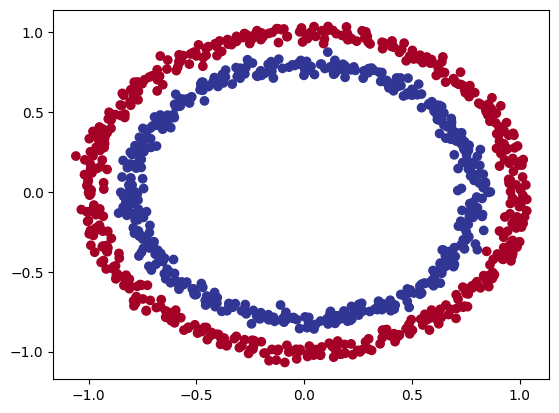

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Check Input and Ouput shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

### Turn Data into tensors and create train and test splits

In [8]:
import torch
torch.manual_seed(42)

/Users/hyunsukim/miniconda3/envs/python-study/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
X = torch.from_numpy(X).type(torch.float32)

In [10]:
y = torch.from_numpy(y).type(torch.float)

In [11]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [12]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

In [14]:
import torch
from torch import nn

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [15]:
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        """
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        """

        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2,out_features=26),
            nn.Linear(in_features=26,out_features=1),
        )

    
    def forward(self, x):
        # out = self.layer_1(x)
        # out = self.layer_22(out)
        return self.two_linear_layers(x)


In [16]:
model_0 = CircleClassifier().to(device)
model_0

CircleClassifier(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=26, bias=True)
    (1): Linear(in_features=26, out_features=1, bias=True)
  )
)

In [17]:
next(model_0.parameters()).device

device(type='mps', index=0)

In [18]:
model_seq = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [19]:
model_0.state_dict()

/Users/hyunsukim/miniconda3/envs/python-study/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525498485/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, 

In [20]:
# Make Predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Len of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Len of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 preds: \n{untrained_preds[:10]}')
print(f'\nFirst 10 labels: \n{y_test[:10]}')

Len of predictions: 200, Shape: torch.Size([200, 1])
Len of test samples: 200, Shape: torch.Size([200, 2])

First 10 preds: 
tensor([[0.3194],
        [0.4173],
        [0.2873],
        [0.3276],
        [0.6439],
        [0.7009],
        [0.6941],
        [0.7614],
        [0.2723],
        [0.4279]], device='mps:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup Loss functions and Optimzier

**Regression**
- Mean Absolute Error (MAE) `torch.nn.L1Loss`
- Mean Squared Error (MSE)
<br/><br/>

**Classification**
- Cross Entropy(CE)

**Optimizer**

- Adam
- SGD
- etc..

### What is Logit
in context of deep learning the logits layer means the layer that feeds in to sofmax (or other such normalization). The output of the softmax are the probabilities for the classification task and its input is logits layers. The logits layer typically produces values from -infinity to +infinity and the softamx layer transforms it to values from 0 to 1.


### What we're going to use
`torch.nn.BECWithLogitsLoss()`

In [21]:
# Setup the Loss Functions
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sigmoid activation function built-in.

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=1e-1)

In [22]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_true) * 100
    return acc

## Train Model

To train our model, we're goint to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward (backpropagation)
5. Optimizer Step, Step, Step

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softamx for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [23]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3194],
        [0.4173],
        [0.2873],
        [0.3276],
        [0.6439]], device='mps:0')

In [24]:
# Use the Sigmoid Function on our model logits to turn them into predcition probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.5792],
        [0.6028],
        [0.5713],
        [0.5812],
        [0.6556]], device='mps:0')

In [25]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='mps:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5 y = 1 (class1)
* `y_pred_probs` < 0.5 y = 0 (class0)

In [26]:
# Find the predicted labels 
y_preds = torch.round(y_pred_probs)

# In full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

y_test[:5], y_preds_labels[:5]

tensor([True, True, True, True, True], device='mps:0')


(tensor([1., 0., 1., 0., 1.]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]], device='mps:0', grad_fn=<SliceBackward0>))

## Building a training and testing loop

In [27]:
import torch
# torch.manual_seed(42)
# torch.cuda.manual_seed()

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

model_0 = CircleClassifier().to(device)

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sigmoid activation function built-in.

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=1e-1)

# Building training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss -> raw logits as input
                   y_train)
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    
    ### Eval
    model_0.eval()
    with torch.inference_mode():
            test_logits = model_0(X_test).squeeze()

            test_pred = torch.round(torch.sigmoid(test_logits))

            test_loss = loss_fn(test_logits, y_test)
            test_acc = accuracy_fn(y_true=y_test, 
                              y_pred=test_pred)
            
    
    if epoch % 10 == 0:
          print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:2f}')

        


Epoch: 0 | Loss: 0.72472, Acc: 40.88% | Test loss: 0.71583, Test acc: 44.500000
Epoch: 10 | Loss: 0.69966, Acc: 47.75% | Test loss: 0.69592, Test acc: 49.000000
Epoch: 20 | Loss: 0.69474, Acc: 48.62% | Test loss: 0.69317, Test acc: 47.500000
Epoch: 30 | Loss: 0.69351, Acc: 49.75% | Test loss: 0.69318, Test acc: 47.000000
Epoch: 40 | Loss: 0.69315, Acc: 49.12% | Test loss: 0.69357, Test acc: 49.000000
Epoch: 50 | Loss: 0.69304, Acc: 50.12% | Test loss: 0.69392, Test acc: 48.000000
Epoch: 60 | Loss: 0.69300, Acc: 50.50% | Test loss: 0.69417, Test acc: 46.000000
Epoch: 70 | Loss: 0.69299, Acc: 51.25% | Test loss: 0.69434, Test acc: 45.500000
Epoch: 80 | Loss: 0.69298, Acc: 50.88% | Test loss: 0.69446, Test acc: 45.500000
Epoch: 90 | Loss: 0.69298, Acc: 51.25% | Test loss: 0.69453, Test acc: 46.000000


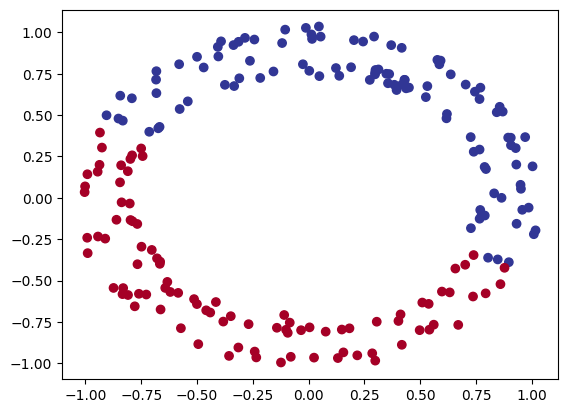

In [28]:
plt_x = X_test.cpu()
plt_c = test_pred.cpu()

plt.scatter(x=plt_x[:,0], y=plt_x[:,1],c=plt_c,cmap=plt.cm.RdYlBu)

## Make Prediction and evalutate the model

From the metrics it looks like our model isn't learning anything..

So to inspect it let's make some 

In [29]:
import requests
import sys
import os

if os.path.exists('helper_functions.py') and not os.path.isdir('helper_functions.py'):
    print('helper_functions.py already exists, skipping download')
else:
    print('Download helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


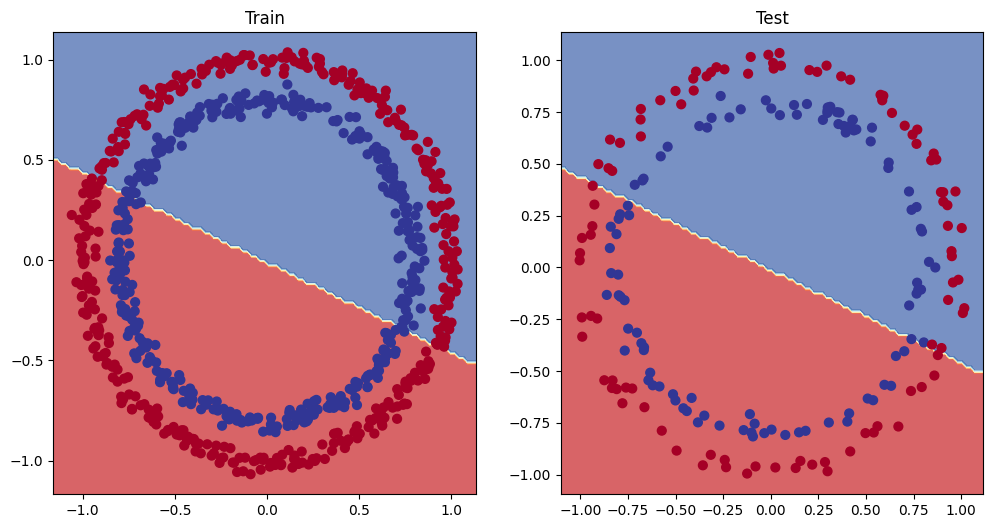

In [30]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

### Improving a model (from a model perspective)
- Add more layers - give the model more chances to learn about patterns in the data
- Add more hidden units
- fit longer (more epochs)
- Changing the activation functions
- change the Learning rate
- Change the Loss function


Because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **HyperParameters**

In [31]:
class CircleClassifierV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10) # (x, y) -> 10 features
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        return out


model_2 = CircleClassifierV2().to(device)
model_2

CircleClassifierV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Createa an optimizer
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr = 1e-1)

In [33]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epochs = 100
for epoch in range(epochs):
    model_2.train()
    y_logits = model_2(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        acc_test = accuracy_fn(y_test, test_pred)
    
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} \t|\t Loss: {loss:.2f}, Acc: {acc:0.2f} \t|\t Test Loss: {test_loss:.2f}, Test Acc: {acc_test:.2f}')


Epoch: 0 	|	 Loss: 0.72, Acc: 50.00 	|	 Test Loss: 0.72, Test Acc: 50.00
Epoch: 10 	|	 Loss: 0.70, Acc: 50.00 	|	 Test Loss: 0.71, Test Acc: 49.00
Epoch: 20 	|	 Loss: 0.70, Acc: 46.12 	|	 Test Loss: 0.70, Test Acc: 47.50
Epoch: 30 	|	 Loss: 0.69, Acc: 48.12 	|	 Test Loss: 0.70, Test Acc: 48.00
Epoch: 40 	|	 Loss: 0.69, Acc: 49.00 	|	 Test Loss: 0.70, Test Acc: 49.00
Epoch: 50 	|	 Loss: 0.69, Acc: 49.12 	|	 Test Loss: 0.70, Test Acc: 49.00
Epoch: 60 	|	 Loss: 0.69, Acc: 49.88 	|	 Test Loss: 0.70, Test Acc: 49.00
Epoch: 70 	|	 Loss: 0.69, Acc: 49.62 	|	 Test Loss: 0.70, Test Acc: 49.00
Epoch: 80 	|	 Loss: 0.69, Acc: 50.00 	|	 Test Loss: 0.70, Test Acc: 48.00
Epoch: 90 	|	 Loss: 0.69, Acc: 50.12 	|	 Test Loss: 0.70, Test Acc: 47.50


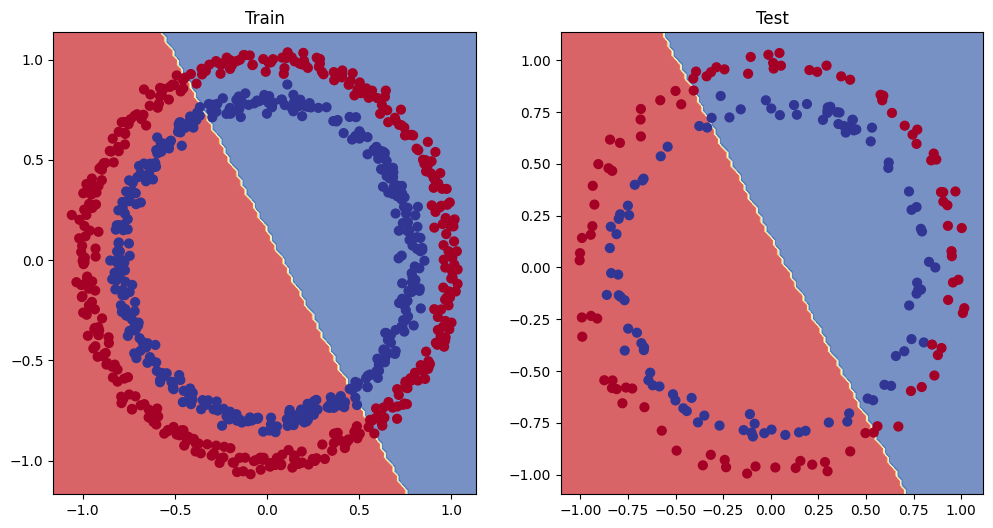

In [34]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_2,X_test,y_test)

### Preparing data to see if our model can fit a straight line

One way to trouble-shoot to a larger problem is to test out smaller problem

In [35]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


len(X_regression), len(y_regression), len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(100, 100, 80, 80, 20, 20)

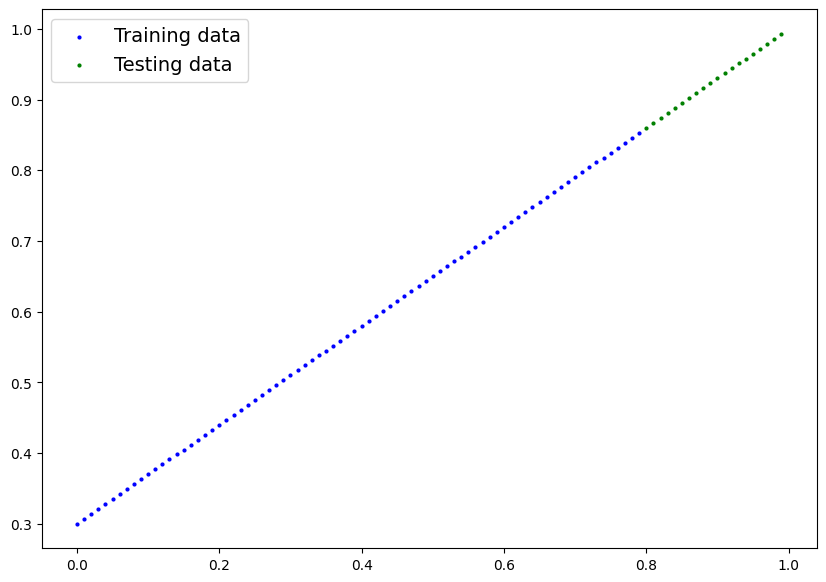

In [36]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [37]:
model_reg = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_reg = model_reg.to(device)

# Create a loss function
loss_fn = nn.L1Loss()
# Createa an optimizer
optimizer = torch.optim.SGD(model_reg.parameters(),
                            lr = 1e-3)

In [38]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

epochs = 1000
for epoch in range(epochs):
    model_reg.train()
    y_preds = model_reg(X_train_regression)
    loss = loss_fn(y_preds, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_reg.eval()
    with torch.inference_mode():
        test_pred = model_reg(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} \t|\t Loss: {loss:.2f} \t|\t Test Loss: {test_loss:.2f}')


Epoch: 0 	|	 Loss: 0.76 	|	 Test Loss: 0.95
Epoch: 100 	|	 Loss: 0.40 	|	 Test Loss: 0.54
Epoch: 200 	|	 Loss: 0.06 	|	 Test Loss: 0.13
Epoch: 300 	|	 Loss: 0.01 	|	 Test Loss: 0.03
Epoch: 400 	|	 Loss: 0.00 	|	 Test Loss: 0.00
Epoch: 500 	|	 Loss: 0.00 	|	 Test Loss: 0.00
Epoch: 600 	|	 Loss: 0.00 	|	 Test Loss: 0.00
Epoch: 700 	|	 Loss: 0.00 	|	 Test Loss: 0.00
Epoch: 800 	|	 Loss: 0.00 	|	 Test Loss: 0.00
Epoch: 900 	|	 Loss: 0.00 	|	 Test Loss: 0.00


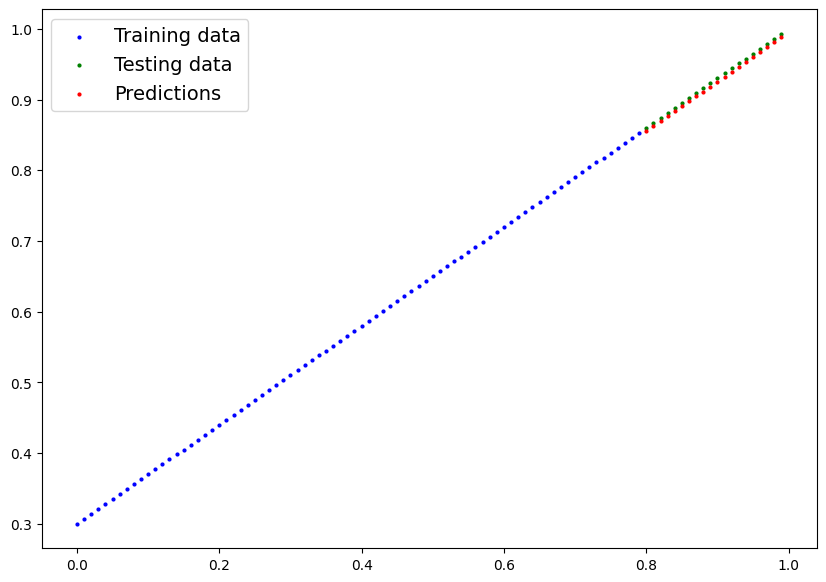

In [39]:
plot_predictions(X_train_regression.cpu().numpy(), y_train_regression.cpu().numpy(), X_test_regression.cpu().numpy(), y_test_regression.cpu().numpy(), test_pred.cpu().numpy())

## The Missing Piece : None-Linearity

What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### Recreating non-linear data

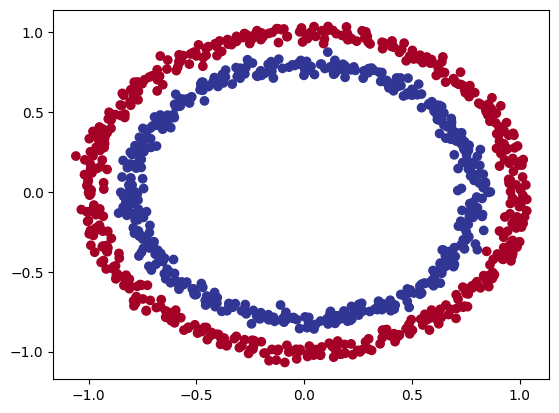

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,noise=0.3, )

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(x=X[:,0], y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [41]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [42]:
# Split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [43]:
from torch import nn

device = 'mps' if torch.backends.mps.is_available() else 'cpu'

class CircleClassifierV3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

In [58]:
model_3 = CircleClassifierV3().to(device=device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [61]:
epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    
    if epoch % 100 == 0 :
        print(f'Epoch: {epoch:.2f} \t|\t Loss:{loss:.2f}     Acc: {acc:.2f}\t|\t TestLoss :{test_loss:.2f}     TestAcc:{test_acc:.2f}')

Epoch: 0.00 	|	 Loss:0.05     Acc: 100.00	|	 TestLoss :0.08     TestAcc:99.00
Epoch: 100.00 	|	 Loss:0.04     Acc: 100.00	|	 TestLoss :0.07     TestAcc:99.50
Epoch: 200.00 	|	 Loss:0.03     Acc: 100.00	|	 TestLoss :0.06     TestAcc:100.00
Epoch: 300.00 	|	 Loss:0.03     Acc: 100.00	|	 TestLoss :0.05     TestAcc:100.00
Epoch: 400.00 	|	 Loss:0.02     Acc: 100.00	|	 TestLoss :0.05     TestAcc:100.00
Epoch: 500.00 	|	 Loss:0.02     Acc: 100.00	|	 TestLoss :0.05     TestAcc:99.50
Epoch: 600.00 	|	 Loss:0.02     Acc: 100.00	|	 TestLoss :0.04     TestAcc:99.50
Epoch: 700.00 	|	 Loss:0.02     Acc: 100.00	|	 TestLoss :0.04     TestAcc:99.50
Epoch: 800.00 	|	 Loss:0.01     Acc: 100.00	|	 TestLoss :0.04     TestAcc:99.50
Epoch: 900.00 	|	 Loss:0.01     Acc: 100.00	|	 TestLoss :0.04     TestAcc:99.50


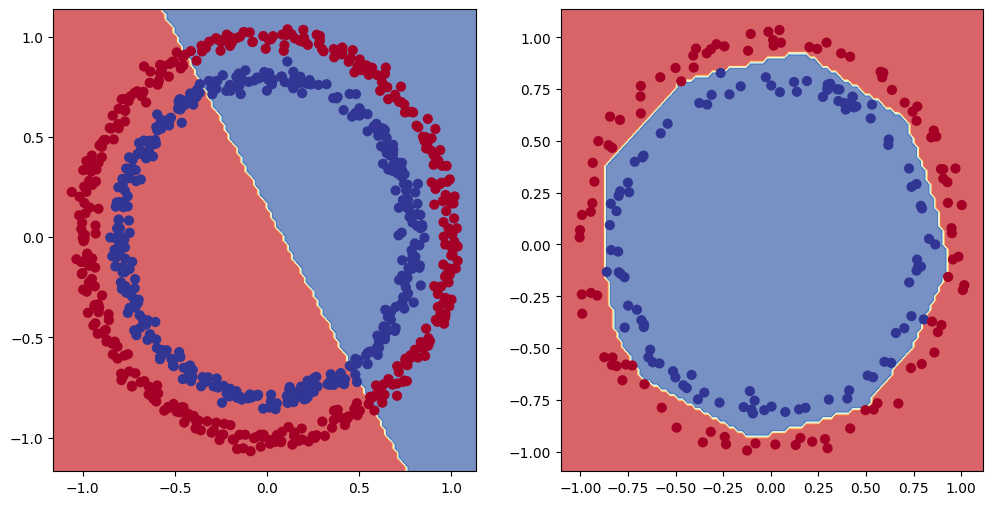

In [62]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_2,X=X_train,y=y_train)

plt.subplot(1,2,2)
plot_decision_boundary(model_3,X=X_test,y=y_test)

## Replicating non-linear Activation Functions

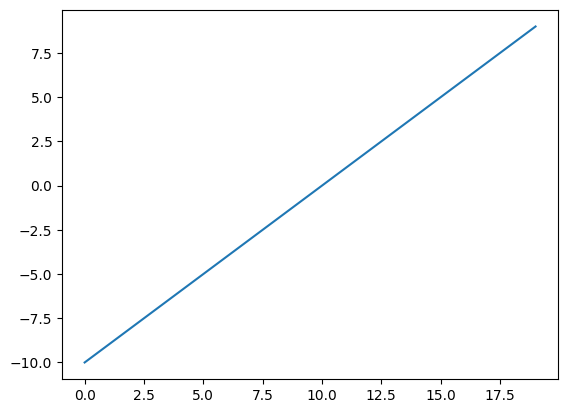

In [47]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
plt.plot(A)

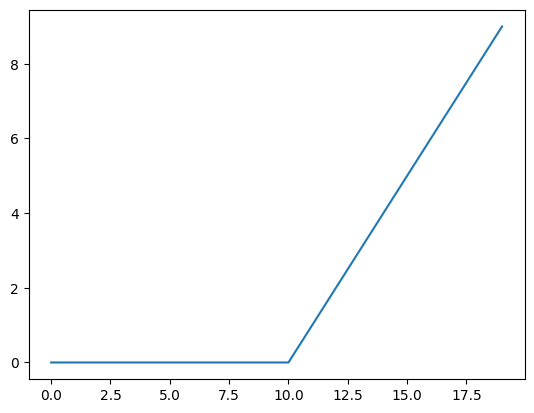

In [48]:
plt.plot(torch.relu(A))

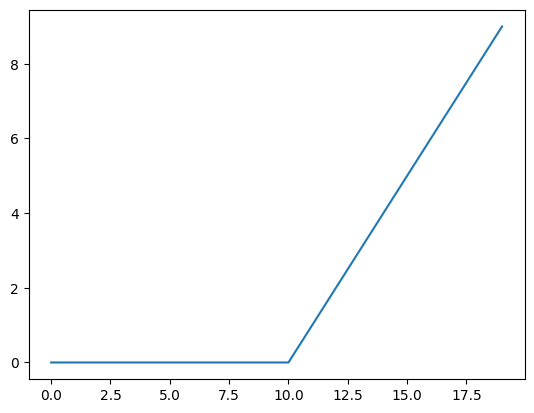

In [49]:
def relu(x):
    return torch.max(torch.tensor(0), x)

plt.plot(relu(A))

In [50]:
def sigmoid(x):
    return 1/ (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

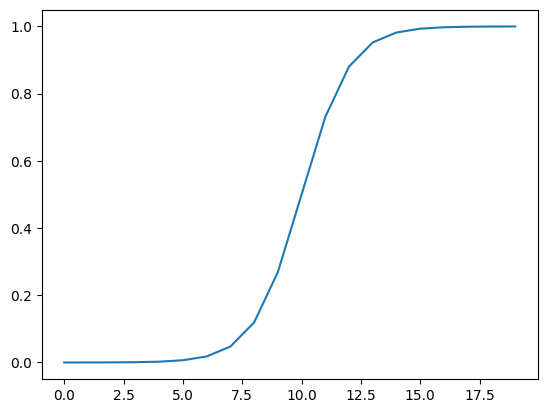

In [51]:
plt.plot(sigmoid(A))